# TD 2 : Théorème des fonctions implicites

In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
x, y = symbols('x y')

## Exercice 1

In [2]:
f = x*exp(y)+sin(ln(y))*exp(x)

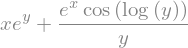

In [3]:
diff(f,y)

In [4]:
_.subs({x:0,y:1})

## Exercice 2

In [5]:
def f1(x, y):
    return 2*exp(x+y)+y-x
print(f1(2,2))

2*exp(4)


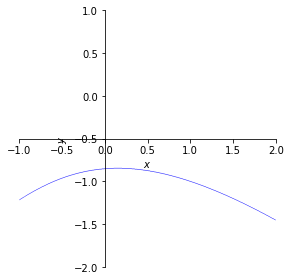

In [6]:
# trace la fonctions phi sur un voisinage
plot_implicit(f1(x, y), (x, -1, 2), (y, -2, 1), aspect_ratio=(1,1))

In [7]:
# On vérifie que les conditions du théorème des fonctions implicites, en s'aidant du graphique pour se donner des idées
print(f1(1,-1))
diff(f1(x, y), y).subs({x: 1, y: -1})

0


In [8]:
# c'est bon, on peut appliquer le théorème des fonctions implicites en (1,-1).
# Maintenant, on cherche un développement limité de la fonction phi
a0, a1, a2, a3, a4, a5 = symbols('a_0 a_1 a_2 a_3 a_4 a_5')
DL = a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + O(x**6)
DL

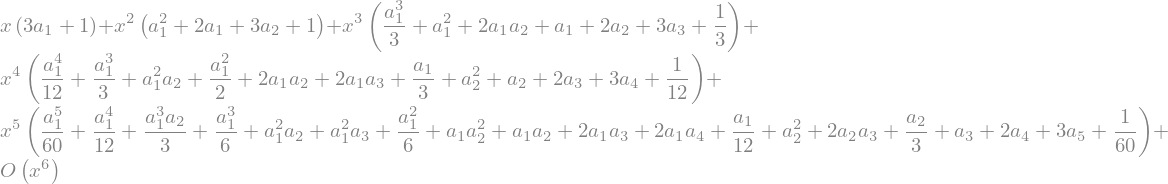

In [9]:
DL2 = series(f1(x + 1, DL - 1), x, 0, 6)
DL2

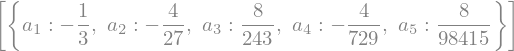

In [10]:
S = solve([DL2.coeff(x, k) for k in range(1, 6)], a1, a2, a3, a4, a5, dict = True)
S

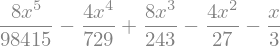

In [11]:
approximation_polynomiale = (DL.subs(S[0])).removeO()
approximation_polynomiale

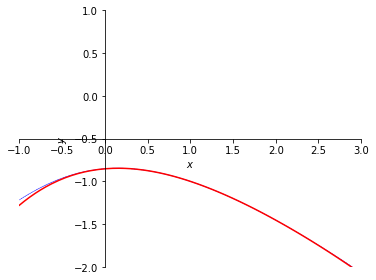

In [12]:
figure1 = plot_implicit(f1(x, y), (x, -1, 3), (y, -2, 1), aspect_ratio=(1,1), show=False, line_color = 'blue')
figure2 = plot((approximation_polynomiale - 1).subs(x, x - 1), (x, -1, 3), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()

## Exercice 3

In [13]:
f3 = sin(y)+x*y**4+x**2
diff(f3,y).subs({x:0,y:0})

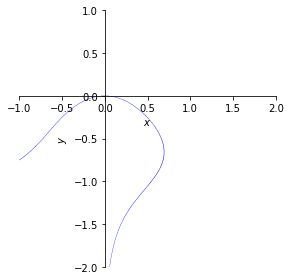

In [14]:
# on trace la fonction phi sur un voisinage de (0,0)
plot_implicit(f3, (x, -1, 2), (y, -2, 1), aspect_ratio=(1,1))

In [15]:
a = symbols('a0:11')
a

In [16]:
DL = sum([a[i] * x**i for i in range(1, 11)]) + O(x**11)
DL

{a1: 0}
{a1: 0, a2: -1}
{a1: 0, a2: -1, a3: 0}
{a1: 0, a2: -1, a3: 0, a4: 0}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0, a6: -1/6}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0, a6: -1/6, a7: 0}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0, a6: -1/6, a7: 0, a8: 0}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0, a6: -1/6, a7: 0, a8: 0, a9: -1}
{a1: 0, a2: -1, a3: 0, a4: 0, a5: 0, a6: -1/6, a7: 0, a8: 0, a9: -1, a10: -3/40}


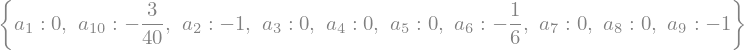

In [17]:
val = {}
for i in range(1, 11):
    DL3 = series(f3.subs(y, DL.subs(val)), x, 0, i + 1)
    val[a[i]] = solve([DL3.coeff(x, i)], a[i])[a[i]]
    print(val)
val

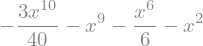

In [18]:
approximation_polynomiale = (DL.subs(val)).removeO()
approximation_polynomiale

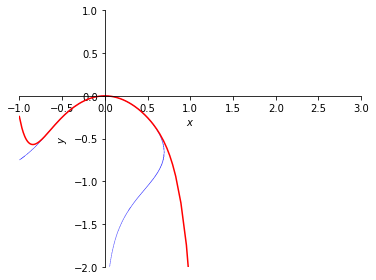

In [19]:
figure1 = plot_implicit(f3, (x, -1, 3), (y, -2, 1), aspect_ratio=(1,1), show=False, line_color = 'blue')
figure2 = plot((approximation_polynomiale-0).subs(x, x-0), (x, -1, 3), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()